# Introductory applied machine learning
# Assignment 3 (Part A): Object Recognition [75%]

<div align="right"><font color="blue" size="5">Your Score was 87.0 out of a total of 94.0, or 92.6%</font></div>

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 3 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part A of Assignment 3 - Part B is the Mini-Challenge. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 22/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook for Part A, *and*
 1. The Jupyter Notebook for Part B
 
All submissions happen electronically. To submit:

1. Fill out this notebook (as well as Part B), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keep the same structure**: retain the questions, **DO NOT** delete any cells and **avoid** adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers.

1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 03_A_ObjectRecognition.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_A_ObjectRecognition.ipynb
    scp -r [FULL PATH TO 03_B_MiniChallenge.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_B_MiniChallenge.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  


### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Note that Part A (this notebook) is worth 75% of the total Mark for Assignment 3, while Part B (Mini-Challenge) is worth 25%: *keep this breakdown in mind when planning your work, especially for Part B*.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [2]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.plotter import plot_confusion_matrix, plot_SVM_DecisionBoundary
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, log_loss
from numpy import unravel_index

/afs/inf.ed.ac.uk/user/s16/s1608480/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Description of the dataset
In this assignment our goal is to recognize objects in images of realistic scenes. There are 19 different classes of object e.g. person, dog, cat, car, etc. The dataset derives from several thousands photographs harvested from the web. Each object of a relevant class has been manually annotated with a bounding box. Images can contain none, one or multiple objects of each class. We have prepared a [website](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) where you can view the images.

We are going to detect whether images contain a person or not - a binary classification problem. To save you time and to make the problem manageable with limited computational resources, we have preprocessed the dataset. We will use the [Bag of Visual Words](https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision) representation. Each column of the dataset (which is not a label), refers to a 'visual word'. Each image is represented by a 500 dimensional vector that contains the normalized count for each of 500 different visual words present in the respective image (a similar representation is used for the spambase dataset, just for real words). *Note that the normalisation procedure involves dividing the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image*. See the Appendix at the bottom of the notebook for more information. The image data is thus a $N \times 500$ dimensional matrix where `N` is the number of images.

The full dataset has 520 attributes (dimensions). The first attribute (`imgId`) contains the image ID which allows you to associate a data point with an actual image. The next 500 attributes (`dim1`, ..., `dim500`) are a normalized count vector for each visual word: these are the `features` of the data. The last 19 attributes, which follow the pattern `is_[class]` are the class labels -- here 1 means the class is present in the image. In most of the experiments (unless explicitly noted otherwise) you will only need the `is_person` attribute and the 500 dimensional feature vector. **Do not use the additional class indicator attributes as features** unless explicitly told to do so. 

**Important**: *Throughout the assignment you will be given various versions of the dataset that are relevant
to a particular question. Please be careful to use the correct version of the dataset when instructed to do so.
If you use the wrong version of the dataset by mistake no marks will be awarded.*

## 1. Exploration of the dataset

<a id='question1_1'></a>
### ========== Question 1.1 --- [12 marks] ==========

We will first get a feel for the data. *IMPORTANT: Show all your code!*

&nbsp;&nbsp;**(a)** [Code] Load the training dataset `Images_A_Train.csv` into a pandas dataframe, keeping only the Visual Features and the `is_person` column. <br>
&nbsp;&nbsp;&nbsp;&nbsp;*Hint: You may wish to first have a look at the column names*<br>
&nbsp;&nbsp;**(b)** [Code] Using suitable pandas methods, summarise the key properties of the data, *and*<br>
&nbsp;&nbsp;**(c)** [Text] comment on your observations from ***(b)*** (dimensionality, data ranges, anything out of the ordinary).

<div align="right"><font color="blue" size="4">10.0/12.0</font></div>

In [3]:
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_A_Train.csv')
train_A = pd.read_csv(data_path, delimiter = ',') # Load the data

In [4]:
train_A.columns # First look at the column names as advised

Index(['imgId', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5', 'dim6', 'dim7', 'dim8',
       'dim9',
       ...
       'is_cow', 'is_diningtable', 'is_dog', 'is_horse', 'is_motorbike',
       'is_person', 'is_pottedplant', 'is_sheep', 'is_sofa', 'is_tvmonitor'],
      dtype='object', length=520)

In [5]:
# We want all the columns with names beginning with 'dim' (the visual features) as well as the is_person column
keep_cs = [c for c in train_A.columns if c.startswith("dim") or c == "is_person"]
train_A = train_A[keep_cs]

In [6]:
# Let's first look at the total number of instances and attributes
print('Number of instances: {}, number of attributes: {}'.format(train_A.shape[0], train_A.shape[1]))

Number of instances: 2093, number of attributes: 501


<div align="right"><font color="blue" size="4">3.0</font></div>

In [7]:
# Now let's look at the first 10 instances
train_A.head(10)

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
0,0.002232,0.000558,0.002790,0.000837,0.001674,0.001953,0.001395,0.002232,0.003627,0.006138,...,0.000558,0.005301,0.001116,0.004185,0.000837,0.006975,0.001953,0.001674,0.000558,1
1,0.001563,0.000391,0.007422,0.003516,0.003906,0.005078,0.001953,0.002344,0.001953,0.001953,...,0.000000,0.008203,0.001172,0.007422,0.004297,0.001563,0.000000,0.003125,0.004687,0
2,0.000521,0.000000,0.000000,0.001042,0.001563,0.005729,0.000521,0.002083,0.003646,0.005208,...,0.000000,0.000521,0.000521,0.002083,0.000000,0.000000,0.000521,0.003646,0.000000,0
3,0.002976,0.002232,0.004464,0.000372,0.000372,0.002232,0.000000,0.003720,0.000000,0.002232,...,0.000000,0.015253,0.000744,0.001488,0.000744,0.000372,0.001860,0.000000,0.001860,1
4,0.001359,0.000340,0.001359,0.000340,0.001359,0.002038,0.002378,0.000000,0.003397,0.003397,...,0.000679,0.000000,0.001359,0.001019,0.003736,0.008152,0.003736,0.000679,0.001698,0
5,0.000000,0.006324,0.000372,0.000372,0.000372,0.000372,0.000744,0.008185,0.000372,0.000372,...,0.005580,0.000744,0.000000,0.000000,0.000000,0.000000,0.001116,0.000372,0.000372,0
6,0.000340,0.000000,0.004416,0.000340,0.000679,0.006114,0.001359,0.002717,0.003057,0.005435,...,0.000000,0.003057,0.001359,0.001698,0.000679,0.006454,0.002378,0.002378,0.001019,1
7,0.000837,0.002232,0.000279,0.000279,0.000837,0.000000,0.000279,0.006696,0.000000,0.000000,...,0.002232,0.004185,0.000000,0.000000,0.000837,0.000000,0.000279,0.000279,0.003627,0
8,0.002378,0.001359,0.004755,0.001019,0.003736,0.001359,0.001019,0.004076,0.003397,0.001698,...,0.000679,0.007133,0.001359,0.002378,0.002378,0.003736,0.002038,0.003057,0.002378,1
9,0.001019,0.000340,0.006454,0.001698,0.001359,0.003736,0.000000,0.004076,0.000000,0.003057,...,0.000000,0.002717,0.002378,0.004755,0.002378,0.000679,0.003057,0.001698,0.003057,0


In [8]:
# Some general information regarding the dataframe
train_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Columns: 501 entries, dim1 to is_person
dtypes: float64(495), int64(6)
memory usage: 8.0 MB


In [9]:
# And now some useful summary statistics
train_A.describe()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
count,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,...,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000
mean,0.001751,0.000756,0.004317,0.001853,0.002272,0.002220,0.001019,0.002446,0.002088,0.002746,...,0.000563,0.004586,0.001541,0.003642,0.002200,0.002928,0.002173,0.002485,0.002978,0.449116
std,0.001193,0.001406,0.003693,0.001340,0.001598,0.001741,0.000873,0.002910,0.001971,0.002328,...,0.001203,0.005825,0.001192,0.002657,0.001664,0.003254,0.001418,0.001997,0.002765,0.497523
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000833,0.000000,0.001359,0.000756,0.001116,0.001019,0.000340,0.000625,0.000744,0.001116,...,0.000000,0.000679,0.000679,0.001698,0.001019,0.000744,0.001116,0.001019,0.001019,0.000000
50%,0.001563,0.000340,0.003397,0.001698,0.002038,0.001860,0.000744,0.001563,0.001698,0.002056,...,0.000000,0.002717,0.001359,0.003057,0.001860,0.001953,0.002038,0.002038,0.002232,0.000000
75%,0.002378,0.000893,0.006324,0.002717,0.003057,0.003057,0.001488,0.003397,0.002717,0.003736,...,0.000679,0.006454,0.002232,0.004808,0.003057,0.003780,0.002976,0.003397,0.004076,1.000000
max,0.009851,0.016644,0.027514,0.010789,0.010417,0.021739,0.005774,0.029830,0.028372,0.020380,...,0.021739,0.053329,0.010234,0.024457,0.011719,0.028125,0.008492,0.014509,0.028533,1.000000


<div align="right"><font color="blue" size="4">4.0</font></div>

We see that we have 2093 instances each with 500 features and one class label 'is_person'. Each feature (the normalised visual word count) is given as a real number to 6 decimal places which is quite precise. However we do see that 5 of the dimensions are stored as integers which is curious, some further investigation into what these features are might be useful. We also see that the means of each feature vary from around 0.001-0.005 meaning we do not have an equal distribution of each visual word. We will have to keep this in mind when performing classification later. Looking at some of the dimensions e.g. dim2, we see that the max value is a few order of magnitudes larger than the mean i.e. we have some signifcant outlier values in our data. We also see that we have fewer instances classified as is_person than not (since the mean for this column is below 0.5) and this could also affect our model.

<div align="right"><font color="blue" size="4">3.0</font></div>

### ========== Question 1.2 --- [8 marks] ==========

Now we will prepare the testing set in a similar manner.

&nbsp;&nbsp;**(a)** [Code] Load the testing dataset `Images_A_Test.csv` into a pandas dataframe: again extract the Visual Features and the `is_person` column. <br>
&nbsp;&nbsp;**(b)** [Code] Using similar methods to [Q1.1](#question1_1) verify that the testing set is similar to the training set.<br>
&nbsp;&nbsp;**(c)** [Text] Indicate the dimensionality, and comment on any discrepancies if any (if they are similar, just say so).

<div align="right"><font color="blue" size="4">8.0/8.0</font></div>

In [11]:
# Load the data and extract the columns we want as before
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_A_Test.csv')
test_A = pd.read_csv(data_path, delimiter = ',') 
test_A = test_A[keep_cs]

<div align="right"><font color="blue" size="4">2.0</font></div>

In [12]:
# Let's double check we have the columns we want
test_A.columns

Index(['dim1', 'dim2', 'dim3', 'dim4', 'dim5', 'dim6', 'dim7', 'dim8', 'dim9',
       'dim10',
       ...
       'dim492', 'dim493', 'dim494', 'dim495', 'dim496', 'dim497', 'dim498',
       'dim499', 'dim500', 'is_person'],
      dtype='object', length=501)

In [15]:
# As before, let's first look at the first few instances
test_A.head()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
0,0.001698,0.000000,0.003057,0.002378,0.001019,0.001698,0.000340,0.001019,0.001359,0.004416,...,0.000000,0.002038,0.000340,0.003397,0.004416,0.000679,0.003736,0.005774,0.007812,1
1,0.002038,0.000000,0.004076,0.001019,0.001019,0.001019,0.000679,0.001019,0.001019,0.002378,...,0.000000,0.003736,0.003397,0.005435,0.002038,0.003397,0.001019,0.001359,0.002717,1
2,0.001116,0.000000,0.005208,0.001860,0.001116,0.000000,0.001488,0.002232,0.001116,0.000372,...,0.000000,0.014137,0.001116,0.004836,0.001488,0.000372,0.001116,0.001488,0.004092,1
3,0.001698,0.000340,0.004076,0.000679,0.002038,0.001019,0.002038,0.001019,0.000340,0.004076,...,0.000340,0.011889,0.001698,0.001698,0.002378,0.002378,0.002038,0.001698,0.001698,1
4,0.003736,0.001019,0.000679,0.001019,0.003736,0.002038,0.002038,0.001359,0.002717,0.001698,...,0.000679,0.000679,0.001359,0.001019,0.001019,0.001019,0.002378,0.001359,0.000000,1


In [17]:
# Some useful information about the dataframe itself
test_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Columns: 501 entries, dim1 to is_person
dtypes: float64(494), int64(7)
memory usage: 4.3 MB


In [14]:
# Now let's compare the useful statistics between the train and test set
test_A.describe()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,...,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000
mean,0.001744,0.000702,0.004720,0.001978,0.002321,0.002110,0.001037,0.002529,0.002006,0.002641,...,0.000598,0.004817,0.001585,0.003611,0.002196,0.002772,0.002239,0.002407,0.003097,0.473495
std,0.001209,0.001364,0.003876,0.001417,0.001558,0.001559,0.000885,0.002736,0.001919,0.002293,...,0.001241,0.005831,0.001243,0.002471,0.001575,0.003182,0.001346,0.001868,0.002590,0.499521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000744,0.000000,0.001698,0.001019,0.001172,0.001019,0.000340,0.000679,0.000781,0.001019,...,0.000000,0.000679,0.000679,0.001860,0.001019,0.000679,0.001250,0.001019,0.001359,0.000000
50%,0.001563,0.000340,0.003736,0.001698,0.002038,0.001803,0.000781,0.001698,0.001563,0.002038,...,0.000000,0.002734,0.001359,0.003125,0.001860,0.001838,0.002038,0.002038,0.002604,0.000000
75%,0.002378,0.000758,0.007102,0.002734,0.003057,0.002976,0.001488,0.003397,0.002717,0.003397,...,0.000679,0.006793,0.002232,0.004836,0.003057,0.003736,0.003057,0.003348,0.004092,1.000000
max,0.007133,0.022135,0.023438,0.008929,0.010417,0.010789,0.005757,0.022396,0.025000,0.013927,...,0.012747,0.042026,0.009821,0.015625,0.013346,0.029225,0.007068,0.011889,0.026786,1.000000


<div align="right"><font color="blue" size="4">3.0</font></div>

We see that the test set has 1113 instances which is just over half the size of the training set. Since this is relatively large we may can keep in mind that we could split this up in order to obtain a validation set. The format of the features of the test set is the same, each normalised count is a real number given to 6 d.p. We also see again that the datatypes we have consist of floats and ints however we seem to have one more column represented as an int for some reason. The range in means also appears to be very similar and again when comparing mean and max values we conclude there are outliers in this data. When looking at the mean of the 'is_person' attribute, we see that the balance of is_person and ~is_person is slightly better in this set although we still have more instances which should be classified ~is_person. This slighly settles concerns we had about the imbalance in the training set as this may suggest that the training set is representative of the general population we are looking at i.e. we would expect to find more instances of ~is_person in general.

<div align="right"><font color="blue" size="4">3.0</font></div>

### ========== Question 1.3 --- [5 marks] ==========

We will now prepare the data for training.

&nbsp;&nbsp;**(a)** [Code] Split both the training and testing sets into a matrix of features (independent) variables [X_tr/X_tst] and a vector of prediction (dependent) variables [y_tr/y_tst]. ***[Optional]*** *As a sanity check, you may wish to verify the dimensionality of the X/y variables*.<br>
&nbsp;&nbsp;**(b)** [Code] Using seaborn's [countplot](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) function, visualise the distribution of the person-class (True/False) in the training and testing sets (use two figures or sub-plots). Annotate your figures.<br>
&nbsp;&nbsp;**(c)** [Text] Do you envision any problems with the distribution under both sets? Would classification accuracy be a good metric for evaluating the performance of the classifiers? Why or why not?

<div align="right"><font color="blue" size="4">5.0/5.0</font></div>

In [18]:
X_tr = train_A.drop(columns=['is_person'])
X_tst = test_A.drop(columns=['is_person'])

y_tr = train_A['is_person']
y_tst = test_A['is_person']

# Sanity checks
print(X_tr.shape) # We expect this to be 2093x500
print(X_tst.shape) # We expect this to be 1113x500
print(y_tr.shape) # We expect this to be 2093x1
print(y_tst.shape) # We expect this to be 1113x1

(2093, 500)
(1113, 500)
(2093,)
(1113,)


<div align="right"><font color="blue" size="4">1.0</font></div>

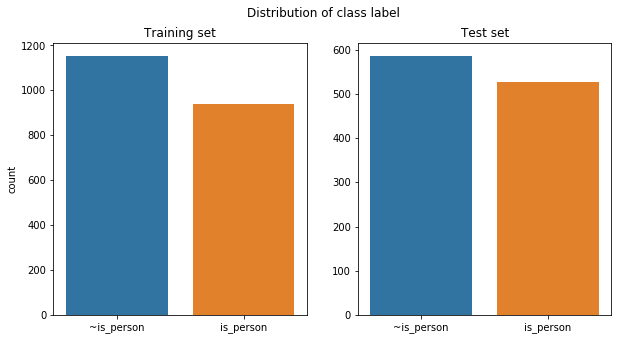

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

sns.countplot(y_tr, ax=ax1) # Plot the distribution of the training data on the first pair of axes
ax1.set_xticklabels(['~is_person', 'is_person'])
ax1.set_xlabel('')
ax1.set_title('Training set', size=12)

sns.countplot(y_tst, ax=ax2) # Distribution of the test set on the second pair of axes
ax2.set_xticklabels(['~is_person', 'is_person'])
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Test set', size=12)

fig.suptitle('Distribution of class label', size=12)

plt.show()

<div align="right"><font color="blue" size="4">2.0</font></div>

We see that we clearly have imbalanced data in both the training and testing set. We have fewer instances classified as is_person than ~is_person. Some machine learning models can be signicantly affected by imbalanced data in the sense that they will overfit to our training set and perform poorly on real data. To simplify it further the model may end up 'expecting' to see more instances of ~is_person than is_person when this may not be the case for the general population. It should be noted that the testing set also has a bias in favour of ~is_person: if we consider the sampling method used to collect the data in both sets and we find that it is a good representation of the whole population (e.g. we have sampled randomly and from lots of different sources) our model may end up generalising quite well - it may be the fact that more images do not include a person in general. However for the model to learn the difference between the two classes it is usually important to have a good balance between classes. If we had the time we could resample the data to check whether it is indeed a representative set.

Classification accuracy may not be the best metric to use to evaluate our model as it may only reflect the underlying distribution of the data: this is known as the accuracy paradox. For example (in the extreme case) if we classified everything as ~is_person we would be classifying more instances in the test set correctly than incorrectly, even though our model is of poor quality. It may be more useful to use a metric such as precision or recall instead.

<div align="right"><font color="blue" size="4">2.0</font></div>

## 2. Exploring Different Models for Classification

### ========== Question 2.1 --- [3 marks] ==========

As always, we wish to start with a very simple baseline classifier, which will provide a sanity check when training more advanced models.

&nbsp;&nbsp;**(a)** [Text] Define a baseline classifier (indicate why you chose it/why it is relevant).<br>
&nbsp;&nbsp;**(b)** [Code] Report the accuracy such a classifier would achieve on the testing set.

<div align="right"><font color="blue" size="4">3.0/3.0</font></div>

The simplest baseline classifier would always classify an instance as the class with the highest prior probability i.e. the most frequently observed class in the training set. As we have already seen from the previous question this would be ~is_person (or '0'). This is useful as it provides a useful point for comparison with a more complex model we create; we obviously want to at least outperform the baseline.

<div align="right"><font color="blue" size="4">2.0</font></div>

In [20]:
# Since we are classifying everything as ~is_person (0), 
# the accuracy of our baseline will be the number of instances of ~is_person
# as a percentage of the size of the test set.

class_counts = y_tst.value_counts()
print ("Accuracy of the baseline on the test set: {:.3f}".format(class_counts[0]/class_counts.values.sum()))

Accuracy of the baseline on the test set: 0.527


<div align="right"><font color="blue" size="4">1.0</font></div>

### ========== Question 2.2 --- [9 marks] ==========
<a id='question2_2'></a>
Let us now train a more advanced Model.

&nbsp;&nbsp;**(a)** [Code] Train a [`LogisticRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier using default settings, except for the `solver` parameter which you should set to `lbfgs`. Report the classification accuracy score on the testing set.<br>
&nbsp;&nbsp;**(b)** [Text] Comment on the performance of the Logistic Regressor in comparison with the baseline model.<br>
&nbsp;&nbsp;**(c)** [Code] Visualise the errors using an appropriate method to justify your answer to (b).<br>
&nbsp;&nbsp;**(d)** [Text] Referring back to the observations in [Q1.1](#question1_1), and assuming that we know that the features should be informative, why do you think this may be happening?<br>

<div align="right"><font color="blue" size="4">8.0/9.0</font></div>

In [21]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr,y_tr)
print('Classification accuracy on test set: {:.3f}'.format(lr.score(X_tst, y_tst)))

Classification accuracy on test set: 0.527


<div align="right"><font color="blue" size="4">2.0</font></div>

The accuracy of the Logistic Regressor is the same as the accuracy of the baseline on the test set. This likely stems from the fact that Logistic Regression is fundamentally based on maximum likelihood. It must be performing the exact same classification as the baseline by predicting every instance to be ~is_person.

<div align="right"><font color="blue" size="4">1.0</font></div>

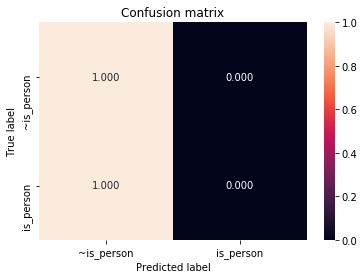

In [22]:
cm = confusion_matrix(y_tst, lr.predict(X_tst))
plot_confusion_matrix(cm, ['~is_person', 'is_person'])

<div align="right"><font color="blue" size="4">3.0</font></div>

Looking back at Q1.1 we saw that all our features had widely different means and standard deviations i.e. they were note scaled properly in relation to each other at all. The consequence of this would be that the logistic regression classifier would take a very long time to converge. Scikit learn's implementation of a logistic regression classifier has a default number of iterations before it stops while trying to maximise the likelihood of the parameters. In this situation the result was so poor that we simply ended up using the prior probabilities to classify new instances. If we were to graph the logistic function we have tuned we would likely see it is very flat with more instances near its middle.

<div align="right"><font color="blue" size="4">2.0</font></div>

### ========== Question 2.3 --- [13 marks] ==========

You should have noticed that the performance of the above logistic regressor is less than satisfactory. Let us attempt to fix this by preprocessing the inputs `X`.

&nbsp;&nbsp;**(a)** [Text] Before applying the processing, comment on whether you should base any parameters of the preprocessing on the training or testing set or both and what repurcussions this may have.<br>
&nbsp;&nbsp;**(b)** [Code] Following from your observations in [Q2.2.(d)](#question2_2), process the features in both the **training** as well as the **testing** sets accordingly. *Hint: There is an sklearn [package](http://scikit-learn.org/0.19/modules/preprocessing.html) which may be very useful.* <br>
&nbsp;&nbsp;**(c)** [Code] Now Train a Logistic Regressor on the transformed training set, keeping the same settings as in the previous question. Report the classification accuracy on the testing set and visualise the errors in a similar way to [Q2.2(c)](#question2_2). <br>
&nbsp;&nbsp;**(d)** [Text] Finally comment on the comparative performance with [Q2.2](#question2_2).

<div align="right"><font color="blue" size="4">13.0/13.0</font></div>

When preprocessing we should base parameters only on our training set. If we were to also look at the testing set while doing this we would be introducing data leakage and our model would generalise poorly. However we must also remember to preprocess the testing data using the exact same parameters we used to preprocess the training data.

<div align="right"><font color="blue" size="4">2.0</font></div>

In [23]:
# We decide to standardise the features to have zero mean and unit variance.
# (unit variance => unit standard deviation)
# This will help the logistic regression classifier to converge more quickly.
# To do this we use the sklearn StandardScaler package

stdiser = StandardScaler()
stdiser.fit(X_tr) # Base the parameters on the training set only

# We now transform both the training and testing set
X_tr = stdiser.transform(X_tr)
X_tst = stdiser.transform(X_tst)

<div align="right"><font color="blue" size="4">5.0</font></div>

In [24]:
# As a sanity check let's look at the means and stds of the 
# first few instances of the training set

# NOTE: We would not expect zero mean and unit variance on the 
# testing set as our parameters are based only on the training set

mean = X_tr[:,0:10].mean(axis=0)
std = X_tr[:,0:10].std(axis=0)
for i in range(10):
    print('Mean: {:.6f}\tStandard Deviation: {:.6f}'.format(mean[i],std[i]))

Mean: -0.000000	Standard Deviation: 1.000000
Mean: -0.000000	Standard Deviation: 1.000000
Mean: 0.000000	Standard Deviation: 1.000000
Mean: 0.000000	Standard Deviation: 1.000000
Mean: -0.000000	Standard Deviation: 1.000000
Mean: 0.000000	Standard Deviation: 1.000000
Mean: 0.000000	Standard Deviation: 1.000000
Mean: 0.000000	Standard Deviation: 1.000000
Mean: -0.000000	Standard Deviation: 1.000000
Mean: -0.000000	Standard Deviation: 1.000000


In [25]:
# We now retrain our logistic regression classifier
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr,y_tr)
print('Classification accuracy on test set: {:.3f}'.format(lr.score(X_tst, y_tst)))

Classification accuracy on test set: 0.643


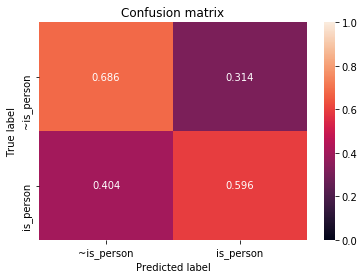

In [26]:
# Visualising the errors using a confusion matrix as before
cm = confusion_matrix(y_tst, lr.predict(X_tst))
plot_confusion_matrix(cm, ['~is_person', 'is_person'])

<div align="right"><font color="blue" size="4">4.0</font></div>

Our new classifier performs much better than the baseline now that we have scaled our data. This is because is now learns uniformly from each feature and its algorithm converges more quickly. We would likely see a very big jump in accuracy on the training set from the baseline for this exact reason and the fact that the features would be scaled perfectly (which is obviously not the case in the testing set as mentioned earlier). Looking at the confusion matrix we see that more instances of is_person were misclassified than ~is_person. This could be a reflection of the imbalance of classes in both the training and testing set (mainly the training set, this could have led to some overfitting).

<div align="right"><font color="blue" size="4">2.0</font></div>

### ========== Question 2.4 --- [18 marks] ==========
<a id='question2_4'></a>
So far we have used default settings for training the logistic regression classifier. Now we want to optimise the hyperparameters of the classifier, namely the regularisation parameter `C`. We will do this through [K-fold cross-validation](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html). You should familiarise yourself with the interpretation of the `C` parameter.

&nbsp;&nbsp;**(a)** [Text] Why do we use cross-validation to optimise the hyper-parameters, rather than using the test-set?<br>
&nbsp;&nbsp;**(b)** [Code] Load the datasets `Images_B_Train.csv` and `Images_B_Test.csv` (this ensures everyone is using the same pre-processed data). Again, extract the relevant columns (`dim1` through `dim500` and the `is_person` class) from each dataset, and store into `X_train`/`X_test` and `y_train`/`y_test` variables.<br>
&nbsp;&nbsp;**(c)** [Code] Using Cross-Validation on the **Training** set (a 5-fold split should be sufficient: set `shuffle=True` and `random_state=0`), perform a search for the best value of `C` in the range `1e-5` to `1e5` (*Hint: the KFold [split](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold.split) method will come in handy*). Keep track of the validation-set accuracy per-fold for each value of `C` in an array. Think carefully about the best way to cover the search space: i.e. the step-lengths and number of steps.<br>
&nbsp;&nbsp;**(d)** [Code] Plot the mean and standard-deviation (across folds) of the accuracy as a function of `C`. *Hint: you may find the matplotlib's [errorbar](https://matplotlib.org/2.2.3/api/_as_gen/matplotlib.pyplot.errorbar.html) function useful. Be careful to use the correct scale on the x-axis.* Using the mean values, report the regularisation parameter with the best accuracy (alongside its accuracy): *N.B. Do not pick the optimal value "by hand", instead use an appropriate numpy function*.<br>
&nbsp;&nbsp;**(e)** [Text] Comment on the output, especially as regards the effect of the regularisation parameter (you should write between 3 and 4 sentences).<br>
&nbsp;&nbsp;**(f)** [Code] By using the optimal value (i.e. the one that yields the highest average K-Fold classification accuracy) train a new `LogisticRegression` classifier on the entire training set and report the classification accuracy on the test set.

**N.B.: Keep track of the KFold object you created as we will keep using it**

<div align="right"><font color="blue" size="4">16.0/18.0</font></div>

A K-fold cross-validation estimator has a lower variance than a single test set since it averages over k different partitions of the data, meaning the performance is less likely to be infuenced by how the data was partitioned than if we used a single test set.

<div align="right"><font color="blue" size="4">1.0</font></div>

In [27]:
# Load the data
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_B_Train.csv')
train_B = pd.read_csv(data_path, delimiter = ',') 
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_B_Test.csv')
test_B = pd.read_csv(data_path, delimiter = ',') 

# Extract the relevant columns
train_B = train_B[keep_cs]
test_B = test_B[keep_cs]

# Create our matrix of features of vector of labels for both sets
X_train = train_B.drop(columns=['is_person'])
X_test = test_B.drop(columns=['is_person'])

y_train = train_B['is_person']
y_test = test_B['is_person']

<div align="right"><font color="blue" size="4">2.0</font></div>

In [28]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

fold = 0
accs = np.ndarray((5,25))
for train_index, test_index in kf.split(X_train, y_train):
    C_iter = 0
    for C in np.logspace(-5, 5, 25):
        lr = LogisticRegression(solver='lbfgs', C=C)
        lr.fit(X_train.iloc[train_index], y_train.iloc[train_index])
        score = lr.score(X_train.iloc[test_index], y_train.iloc[test_index])
        accs[fold, C_iter] = score
        C_iter += 1
    fold += 1

<div align="right"><font color="blue" size="4">6.0</font></div>

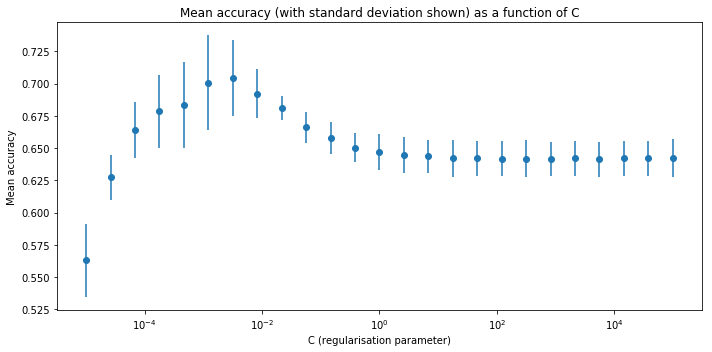

The optimal value for C is 0.00316 which gives us a mean accuracy of 0.70424


In [29]:
Cs = np.logspace(-5,5,25)
means = accs.mean(axis=0)
stds = accs.std(axis=0)

plt.figure(figsize=(10,5))
plt.xscale('log') # We show a log scale for the x axis
plt.errorbar(Cs, means, yerr=stds, fmt='o')

plt.xlabel('C (regularisation parameter)')
plt.ylabel('Mean accuracy')
plt.title('Mean accuracy (with standard deviation shown) as a function of C')

plt.tight_layout()
plt.show()

# We choose the value of C with the highest average accuracy
C_best = Cs[means.argmax()]

print("The optimal value for C is {:.5f} which gives us a mean accuracy of {:.5f}".format(C_best, means.max()))

<div align="right"><font color="blue" size="4">5.0</font></div>

By using cross-validation we have improved our accuracy again. This is because cross-validation tends to reduce the problem of variance we encounter when working with a single train/test split. The regularisation parameter controls the degree to which we penalise large magnitudes for the weight vector, helping to prevent overfitting. In the case of logistic regression it also indicates the level of confidence in making predictions.

We see that for low levels of the regularisation parameter the accuracy is very low, however as its magnitude becomes comparable to the actual features we are looking at the accuracy becomes much higher and doesn't decrease too much even as we continue to increase its value. This shows that without the regularisation parameter we were probably overfitting which was leading to poor generalisation. By penalising more complex solutions we reduce the effect of this problem a great deal.

<div align="right"><font color="blue" size="4">1.0</font></div>

In [30]:
lr = LogisticRegression(solver='lbfgs', C=C_best)
lr.fit(X_train, y_train)
print('Classification accuracy on test set: {:.3f}'.format(lr.score(X_test, y_test)))

Classification accuracy on test set: 0.695


<div align="right"><font color="blue" size="4">1.0</font></div>

### ========== Question 2.5 --- (LEVEL 11) --- [12 marks] ==========

Let us attempt to validate the importance of the various features for classification. We could do this like we did for linear regression by looking at the magnitude of the weights. However, in this case, we will use the [`RandomForestClassifier`](http://scikit-learn.org/0.19/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to give us a ranking over features.

&nbsp;&nbsp;**(a)** [Text] How can we use the Random-Forest to get this kind of analysis? *Hint: look at the `feature_importances` property in the SKLearn implementation.*<br>
&nbsp;&nbsp;**(b)** [Code] Initialise a random forest classifier and fit the model by using training data only and 500 trees (i.e. `n_estimators=500`). Set `random_state=42` to ensure reproducible results and `criterion=entropy` but leave all other parameters at their default value. Report the accuracy score on both the training and testing sets.<br>
&nbsp;&nbsp;**(c)** [Text] Comment on the discrepancy between training and testing accuracies.<br>
&nbsp;&nbsp;**(d)** [Code] By using the random forest model display the names of the 10 most important features (in descending order of importance).<br>


(a) ***Your answer goes here:***

In [ ]:
# (b) # Your Code goes here:

(c) ***Your answer goes here:***

In [ ]:
# (d) # Your Code goes here:

### ========== Question 2.6 --- [12 marks] ==========

We would like now to explore another form of classifier: the Support Vector Machine. A key decision in training SVM's is what kind of kernel to use. We will explore with three kernel types: linear, radial-basis-functions and polynomials. To get a feel for each we will first visualise typical decision boundaries for each of these variants. To do so, we have to simplify our problem to two-dimensional input (to allow us to visualise it).

&nbsp;&nbsp;**(a)** [Code] Using the training set only, create a training `X` matrix with only the `dim21` and `dim51` columns. ***N.B.*** *Python (and numpy) use zero-based indexing*. Then train three distinct classifiers on this 2D data. Use a `linear` kernel (still using an `SVC` not the `LinearSVC` object) for one, an `rbf` kernel for another (set `gamma='auto'`) and a second order (`degree`) polynomial kernel for the other. Set `C=1` in all cases. Using the function `plot_SVM_DecisionBoundary` from our own library (it exists under the `plotters` module), plot the decision boundary for all three classifiers. <br>
&nbsp;&nbsp;**(b)** [Text] Explain (intuitively) the shape of the decision boundary for each classifier (i.e. comment on what aspect of the kernel gives rise to it). Use this to comment on how it relates to classification accuracy.

<div align="right"><font color="blue" size="4">10.0/12.0</font></div>

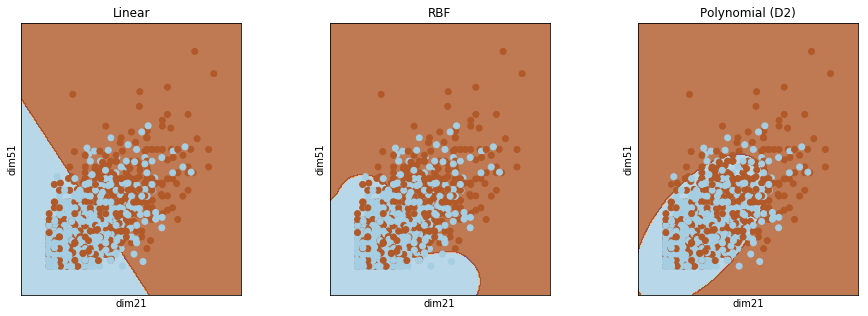

In [31]:
# Create the training matrix
X = X_train[['dim21', 'dim51']].values 

# Create the 3 SVMs
svc_l = SVC(kernel='linear', C=1)
svc_rbf = SVC(kernel='rbf', gamma='auto', C=1)
svc_p = SVC(kernel='poly', degree=2, C=1)

# Fit the three SVMs
svc_l.fit(X, y_train)
svc_rbf.fit(X, y_train)
svc_p.fit(X, y_train)

# Plot the decision boundaries
clfs = [svc_l, svc_rbf, svc_p]
title = ["Linear", "RBF", "Polynomial (D2)"]
labels = ["dim21", "dim51"]
plot_SVM_DecisionBoundary(clfs, X, y_train, title, labels)

<div align="right"><font color="blue" size="4">5.0</font></div>

The linear kernel models the decision boundary as a hyperplane (in this case a straight line). It is rarely the case that our data is linearly separable and as we can see from the plot many instances have been misclassified. In the polynomial example we have modeled the decision boundary as a polynomial of degree 2 which gives it its round shape. This allows us to gain a slightly better fit of the data however we can still see many misclassified instances. The radial nature of the RBF example is evident from the two bulges we see near the centre of each axis. We see from the plots that of the three SVMs the one with an RBF kernel is able to classify more instances correctly due to its ability to incorporate added complexity to the decision boundary it creates.

<div align="right"><font color="blue" size="4">5.0</font></div>

### ========== Question 2.7 --- [14 marks] ==========
Let us now explore the polynomial SVM further. We will go back to using the dataset with **ALL** features (i.e. the one we loaded in [Question 2.4](#question2_4)). There are two parameters we need to tune: the order of the polynomial and the regression coefficient. We will do this by way of a grid-search over parameters. To save computational time, we will use a constrained search space:

&nbsp;&nbsp;**(a)** [Code] Define an appropriate search space for `C` in the range `1e-2` to `1e3` using 6-steps (think about the step-size), and for the `degree` in the range 1 through 5 inclusive (5 steps). Using the `K-fold` iterator from [Q2.4](#question2_4), optimise the values for `C` and the `degree` in the above specified range. Keep track of the mean cross-validation accuracy for each parameter combination.<br>
&nbsp;&nbsp;**(b)** [Code] Using a seaborn heatmap, plot the fold-averaged classification accuracy for each parameter combination (label axes appropriately). Finally also report the combination of the parameters which yielded the best accuracy.<br>
&nbsp;&nbsp;**(c)** [Code] Retrain the (polynomial-kernel) SVC using the optimal parameters found in **(b)** and report its accuracy on the **Testing** set.<br>
&nbsp;&nbsp;**(d)** [Text] Explain the results relative to the Logistic Classifier.

<div align="right"><font color="blue" size="4">14.0/14.0</font></div>

In [32]:
C_space = np.logspace(-2, 3, 6)
deg_space = np.arange(1, 6)
C_space

accs = np.ndarray((5,6,5))
fold=0
for train_index, test_index in kf.split(X_train, y_train):
    C_iter = 0
    for C in C_space:
        deg_iter = 0
        for deg in deg_space:
            svc_p = SVC(kernel='poly', degree=deg, C=C)
            svc_p.fit(X_train.iloc[train_index], y_train.iloc[train_index])
            score = svc_p.score(X_train.iloc[test_index], y_train.iloc[test_index])
            accs[fold, C_iter, deg_iter] = score
            deg_iter += 1
        C_iter += 1
    fold += 1

<div align="right"><font color="blue" size="4">5.0</font></div>

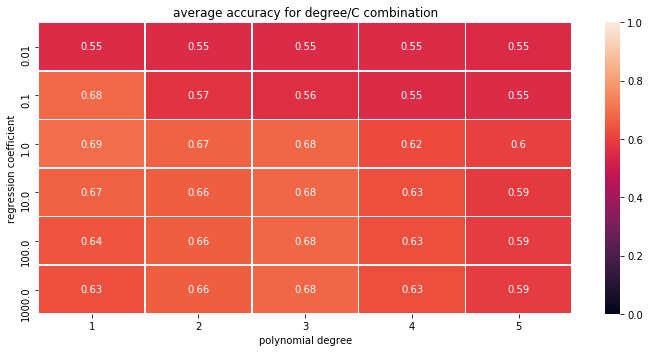

Optimal value for C: 1.0
Optimal polynomial degree: 1
Mean accuracy: 0.692772


In [33]:
means = accs.mean(axis=0)

plt.figure(figsize=(10,5))
fig = sns.heatmap(means, vmin=0, vmax=1, annot=True, linewidths=.5)
fig.set_xticklabels([1,2,3,4,5])
fig.set_yticklabels(np.logspace(-2,3,6))
fig.set_xlabel('polynomial degree')
fig.set_ylabel('regression coefficient')
fig.set_title('average accuracy for degree/C combination')

plt.tight_layout()
plt.show()

# Now we want to find the optimal combination of parameters
op_indices = unravel_index(means.argmax(), means.shape)
op_c = C_space[op_indices[0]]
op_d = deg_space[op_indices[1]]
print("Optimal value for C: {}\nOptimal polynomial degree: {}\nMean accuracy: {:5f}".format(op_c, op_d, means.max()))

<div align="right"><font color="blue" size="4">4.0</font></div>

In [34]:
svc_p = SVC(kernel='poly', degree=op_d, C=op_c)
svc_p.fit(X_train, y_train)
print('Classification accuracy on test set: {:.3f}'.format(svc_p.score(X_test, y_test)))

Classification accuracy on test set: 0.689


<div align="right"><font color="blue" size="4">2.0</font></div>

After optimising the parameters in our SVM we ended up using a polynomial of degree 1 for our kernel. In other words we just ended up using a linear kernel. In general, a logistic regression classifier and SVM with linear kernel will perform quite similarly and this is evident in this case by the fact that our classification accuracy is roughly the same as it was for the logistic regression classifier.

<div align="right"><font color="blue" size="4">3.0</font></div>

### ========== Question 2.8 --- (LEVEL 11) --- [10 marks] ==========

Answer the followign theoretical questions:

&nbsp;&nbsp;**(a)** [Text] Is a Logistic Regression Classifier equivalent to an SVM with a Linear Kernel? why or why not?<br>
&nbsp;&nbsp;**(b)** [Text] In the previous question we optimised the `degree` and regularisation `C` simultaneously. By looking at the heatmap you plotted, can you explain the motivation behind this? That is, what would happen if we were to estimate the optimum along each dimension independently? Can you imagine a case where an independent search along each of the dimensions (known as coordinate-descent) would be guaranteed to yield the optimum result?<br>
&nbsp;&nbsp;**(c)** [Text] Despite having a hold-out testing set, we used cross-validation for optimising the hyper-parameters (only using the testing set for comparing models). Why is this? Also, mention an advantage and a disadvantage of using cross-validation to train hyper-parameters rather than a further train/validation split.

(a) ***Your answer goes here:***

(b) ***Your answer goes here:***

(c) ***Your answer goes here:***

# Appendix
## More information about visual words

The Visual words used in this project are based on [Scale-invariant feature transforms (SIFT)](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform). SIFT features are essentially local orientation histograms and capture the properties of small image regions. They possess attractive invariance properties which make them well suited for our task (you can read more about SIFT features in [D.Lowe, IJCV 60(2):91- 110, 2004](http://link.springer.com/article/10.1023/B:VISI.0000029664.99615.94), but the details don't matter for the purpose of this assignment). Each SIFT feature is a 128 dimensional vector. From each image many SIFT features are extracted, typically > 2500 per image (features are extracted at regular intervals using a 15 pixel grid and at 4 different scales). To obtain visual words a representative subset of all extracted SIFT features from all images is chosen and clustered with k-means using 500 centres (such use of the k-means algorithm will be discussed in detail during the lecture). These 500 cluster centres form our visual words. The representation of a single image is obtained by first assigning each SIFT feature extracted from the image to the appropriate cluster (i.e. we determine the visual word corresponding to each feature by picking the closest cluster centre). We then count the number of features from that image assigned to each cluster (i.e. we determine how often each visual word is present in the image). This results in a 500 dimensional count vector for each image (one dimension for each visual word). The normalized version of this count vector gives the final representation of the image (normalized means that we divide the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image)